# Supervised Learning - LASSO&Ridge

This collab notebook is an introduction to simple and LASSO and Ridge techniques.

![alt text](https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png)

LASSO and Ridge regressions are ways to combat overfitting by penalizing high value coefficients. Mathematically it is apparent in MSE (Loss function).

$$MSE_{LASSO} = \sum_{i=1}^{n}{\varepsilon_i^2} + \alpha\sum_{j=1}^{p}{|b_j|}$$
$$MSE_{Ridge} = \sum_{i=1}^{n}{\varepsilon_i^2} + \alpha\sum_{j=1}^{p}{b_j^2}$$


These effectively are constrained minimization problem. In ridge constraint is a circle, while in LASSO constraint is a tilted square. We will see the effect graphically below.

$\alpha$ is a tunable parameter

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

Head to https://www.kaggle.com/rakannimer/air-passengers and download the data.

In [0]:
!mkdir dataset

In [0]:
path = 'dataset/'

In [0]:
df = pd.read_csv(path+'AirPassengers.csv')

In [0]:
# Seperate Passengers from time
X = pd.DataFrame(df.index)
#X = X/25 # for visualization purposes
#df['#Passengers'] = df['#Passengers']/100 # for visualization purposes
X.columns = ['time']
Y = df['#Passengers']
# add the logarithm of the time
X['time_log'] = X.apply(lambda x: np.log(x+1)*20)

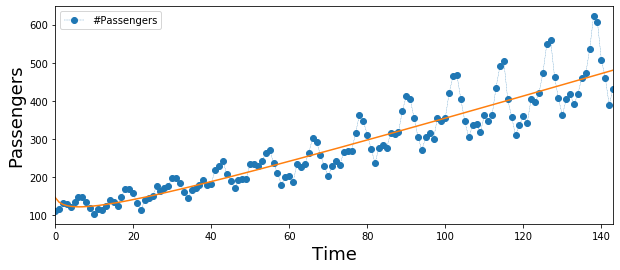

b1: 3.1069302345852647 b2: -1.11686034294395


In [8]:
# Fit Regression
ols = LinearRegression()
ols.fit(X,Y)

# Plot
df.plot(figsize = (10,4), style = 'o--', linewidth = 0.3)
plt.plot(ols.predict(X))
plt.xlabel('Time',fontsize = 18)
plt.ylabel('Passengers',fontsize = 18)
plt.show()
print('b1:',ols.coef_[0],'b2:',ols.coef_[1])

In [0]:
def calc_RMSE(b0,b1,b2, X = X, Y = Y):
    
    """Calculate (Root) Mean square error 
       
        args:
         b0: intercept
         b1: slope
         X: independent data
         Y: dependent data
         
        return:
         vector of MSE for different coefficients
    """
    
    y_hat = (np.array(X) * [b1,b2]).sum(axis = 1) + b0
    error = y_hat - np.array(Y)

    return np.sqrt(np.sum(np.square(error)/(2*len(Y)), axis = 0))

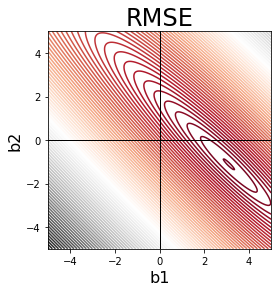

In [10]:
b0 = ols.intercept_
b1 = np.linspace(-5,5,300)
b2 = np.linspace(-5,5,300)

x0_coef, x1_coef = np.meshgrid(b1, b2)

all_RMSE = []
for i in b2:
    all_RMSE.append(calc_RMSE(b0,b1,i))

plt.figure(figsize = (4,4))
plt.contour(x0_coef, x1_coef, all_RMSE, 100, cmap='RdGy')
plt.axhline(0,c = 'black',linewidth = 1)
plt.axvline(0,c = 'black',linewidth = 1)
plt.xlabel('b1',fontsize = 16)
plt.ylabel('b2',fontsize = 16)
plt.title('RMSE', fontsize = 24)
#plt.Circle((2, 100), radius=4, color='g')
#plt.savefig('contour_simple.png', bbox_inches = 'tight')
plt.show()

### Ridge

In [0]:
from sklearn.linear_model import Ridge

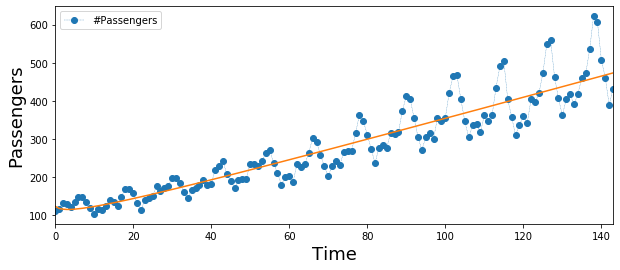

b1: 2.869688562170022 b2: -0.6136368331676484


In [12]:
# Fit Regression
ridge = Ridge(alpha = 3000) # experiment with alpha to get different results
ridge.fit(X,Y)

# Plot
df.plot(figsize = (10,4), style = 'o--', linewidth = 0.3)
plt.plot(ridge.predict(X))
plt.xlabel('Time',fontsize = 18)
plt.ylabel('Passengers',fontsize = 18)
plt.show()
print('b1:',ridge.coef_[0],'b2:',ridge.coef_[1])

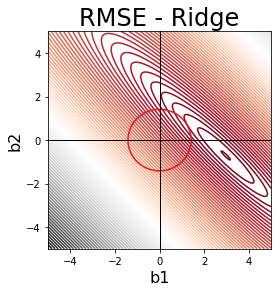

In [13]:
b0 = ridge.intercept_
b1 = np.linspace(-5,5,300)
b2 = np.linspace(-5,5,300)

x1_coef, x2_coef = np.meshgrid(b1, b2)
alpha = 0.5 # change alpha to see how the condition changes (NOT SAME SCALE AS IN SCIKIT)
# Ridge conditions
ridge_b1 = alpha * x1_coef**2
ridge_b2 = alpha * x2_coef**2

all_RMSE = []
for i in b2:
    all_RMSE.append(calc_RMSE(b0,b1,i))

plt.figure(figsize = (4,4))
plt.contour(x1_coef, x2_coef, all_RMSE, 100, cmap='RdGy')
plt.contour(x1_coef, x2_coef, np.sqrt(ridge_b1+ridge_b2), [1], cmap='Set1')
plt.axhline(0,c = 'black',linewidth = 1)
plt.axvline(0,c = 'black',linewidth = 1)
plt.xlabel('b1',fontsize = 16)
plt.ylabel('b2',fontsize = 16)
plt.title('RMSE - Ridge', fontsize = 24)

plt.show()

In [0]:
from sklearn.linear_model import Lasso

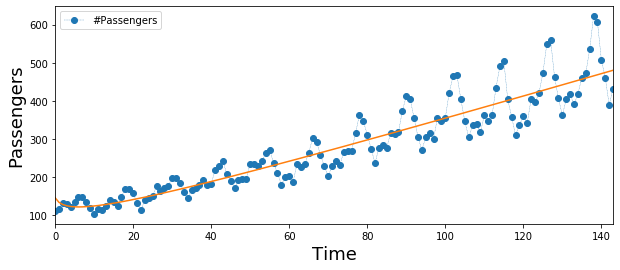

b1: 3.098536400420395 b2: -1.0975062344035695


In [15]:
# Fit Regression
lasso = Lasso(alpha = 1) # experiment with alpha to get different results
lasso.fit(X,Y)

# Plot
df.plot(figsize = (10,4), style = 'o--', linewidth = 0.3)
plt.plot(lasso.predict(X))
plt.xlabel('Time',fontsize = 18)
plt.ylabel('Passengers',fontsize = 18)
plt.show()
print('b1:',lasso.coef_[0],'b2:',lasso.coef_[1])

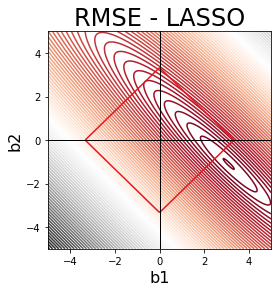

In [16]:
b0 = lasso.intercept_
b1 = np.linspace(-5,5,300)
b2 = np.linspace(-5,5,300)

x1_coef, x2_coef = np.meshgrid(b1, b2)
alpha = 0.3 # change alpha to see how the condition changes (NOT SAME SCALE AS IN SCIKIT)
# LASSO conditions
LASSO_b1 = alpha * np.abs(x1_coef)
LASSO_b2 = alpha * np.abs(x2_coef)

all_RMSE = []
for i in b2:
    all_RMSE.append(calc_RMSE(b0,b1,i))

plt.figure(figsize = (4,4))
plt.contour(x1_coef, x2_coef, all_RMSE, 100, cmap='RdGy')
plt.contour(x1_coef, x2_coef, np.sqrt(LASSO_b1+LASSO_b2), [1], cmap='Set1')
plt.axhline(0,c = 'black',linewidth = 1)
plt.axvline(0,c = 'black',linewidth = 1)
plt.xlabel('b1',fontsize = 16)
plt.ylabel('b2',fontsize = 16)
plt.title('RMSE - LASSO', fontsize = 24)

plt.show()

Usually 2 techniques are combined together with some weights. Such approach received name _Elastic Net_.

$$MSE_{Elastic} = \sum_{i=0}^{n}{\varepsilon_i^2} + \alpha_1\sum_{j=1}^{p}{|b_j|}+ \alpha_2\sum_{j=1}^{p}{b_j^2}$$

In [0]:
from sklearn.linear_model import ElasticNet

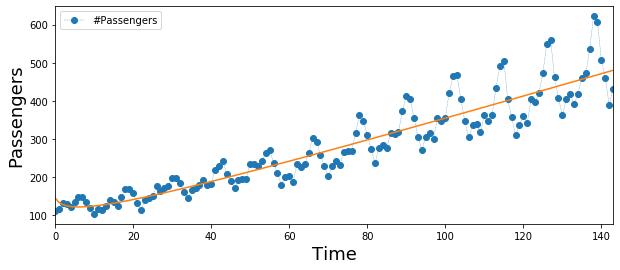

b1: 3.0954149383519187 b2: -1.091232010032737


In [18]:
# Fit Regression
en = ElasticNet(alpha = 1, l1_ratio = 0.5) # experiment with alpha to get different results
# alpha * l1_ratio * |b| + alpha * (1-l1_ratio) * b^2
en.fit(X,Y)

# Plot
df.plot(figsize = (10,4), style = 'o--', linewidth = 0.3)
plt.plot(en.predict(X))
plt.xlabel('Time',fontsize = 18)
plt.ylabel('Passengers',fontsize = 18)
plt.show()
print('b1:',en.coef_[0],'b2:',en.coef_[1])

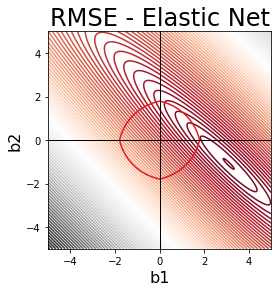

Text(0.5, 0, 'RMSE')

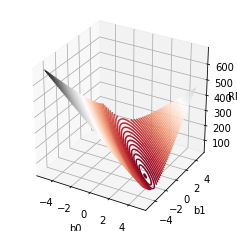

In [19]:
b0 = en.intercept_
b1 = np.linspace(-5,5,300)
b2 = np.linspace(-5,5,300)

x1_coef, x2_coef = np.meshgrid(b1, b2)
alpha1 = 0.2 # change alpha to see how the condition changes
alpha2 = 0.2 # change alpha to see how the condition changes
# LASSO conditions
LASSO_b1 = alpha1 * np.abs(x1_coef)
LASSO_b2 = alpha1 * np.abs(x2_coef)
ridge_b1 = alpha2 * x1_coef**2
ridge_b2 = alpha2 * x2_coef**2
all_RMSE = []
for i in b2:
    all_RMSE.append(calc_RMSE(b0,b1,i))

plt.figure(figsize = (4,4))
plt.contour(x1_coef, x2_coef, all_RMSE, 100, cmap='RdGy')
plt.contour(x1_coef, x2_coef, np.sqrt(LASSO_b1+LASSO_b2+ridge_b1+ridge_b2), [1], cmap='Set1')
plt.axhline(0,c = 'black',linewidth = 1)
plt.axvline(0,c = 'black',linewidth = 1)
plt.xlabel('b1',fontsize = 16)
plt.ylabel('b2',fontsize = 16)
plt.title('RMSE - Elastic Net', fontsize = 24)

plt.show()

fig = plt.figure(figsize = (4,4))
ax = plt.axes(projection='3d')
ax.contour3D(x1_coef, x2_coef, all_RMSE, 100, cmap='RdGy')
ax.set_xlabel('b0')
ax.set_ylabel('b1')
ax.set_zlabel('RMSE')

An **important** aspect is to standartize your $X$ data for LASSO/Ridge?Elastic Net. The reason is that variables with different scales will contribute to penalty term  with different proportions, thus one variable may not be penalized at all while the other will be heavily penalized due to scale. And to have values of $alphas$ not too small and to big it is advised to scale $Y$ data also.

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scalerx = StandardScaler()
scalerx.fit(X)
X_transformed = scalerx.transform(X)

In [0]:
scalery = StandardScaler()
scalery.fit(np.array(Y).reshape(-1, 1))
Y_transformed = scalery.transform(np.array(Y).reshape(-1, 1))

In [23]:
# Fit Regression
en = ElasticNet(alpha = 1, l1_ratio = 0.5) # experiment with alpha to get different results
# alpha * l1_ratio * |b| + alpha * (1-l1_ratio) * b^2
en.fit(X_transformed,Y_transformed)

print('b1:',en.coef_[0],'b2:',en.coef_[1])

b1: 0.26147770318895514 b2: 0.035618481273917334


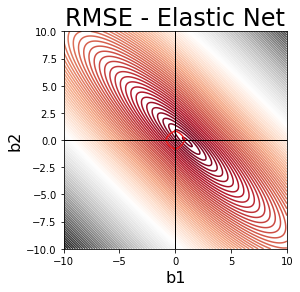

Text(0.5, 0, 'RMSE')

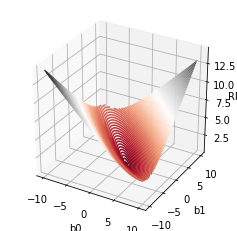

In [24]:
b0 = en.intercept_
b1 = np.linspace(-10,10,300)
b2 = np.linspace(-10,10,300)

x1_coef, x2_coef = np.meshgrid(b1, b2)
alpha1 = 0.6 # change alpha to see how the condition changes
alpha2 = 0.7 # change alpha to see how the condition changes
# LASSO conditions
LASSO_b1 = alpha1 * np.abs(x1_coef)
LASSO_b2 = alpha1 * np.abs(x2_coef)
ridge_b1 = alpha2 * x1_coef**2
ridge_b2 = alpha2 * x2_coef**2
all_RMSE = []
for i in b2:
    all_RMSE.append(calc_RMSE(b0,b1,i, X = X_transformed, Y = Y_transformed.flatten()))

plt.figure(figsize = (4,4))
plt.contour(x1_coef, x2_coef, all_RMSE, 100, cmap='RdGy')
plt.contour(x1_coef, x2_coef, np.sqrt(LASSO_b1+LASSO_b2+ridge_b1+ridge_b2), [1], cmap='Set1')
plt.axhline(0,c = 'black',linewidth = 1)
plt.axvline(0,c = 'black',linewidth = 1)
plt.xlabel('b1',fontsize = 16)
plt.ylabel('b2',fontsize = 16)
plt.title('RMSE - Elastic Net', fontsize = 24)

plt.show()

fig = plt.figure(figsize = (4,4))
ax = plt.axes(projection='3d')
ax.contour3D(x1_coef, x2_coef, all_RMSE, 100, cmap='RdGy')
ax.set_xlabel('b0')
ax.set_ylabel('b1')
ax.set_zlabel('RMSE')

More theoretical side of Ridge, LASSO, CrossValidation
http://statweb.stanford.edu/~tibs/sta305files/Rudyregularization.pdf